### Access libraries that will be used

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [3]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'K:\\magic2.csv')
magic.head()

,FirstName,LastName,Age,Pos,Date,Tm,Column1,Opp,W/L,GmSc,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
0,Nikola,Vucevic,30-066,C,12/29/2020,ORL,Away,OKC,W,27.9,...,3,7,10,5,1,0,1,0,28,13.7
1,Nikola,Vucevic,30-077,C,1/9/2021,ORL,Away,DAL,L,26.7,...,3,12,15,2,2,0,0,3,30,14.5
2,Nikola,Vucevic,30-070,C,1/2/2021,ORL,Home,OKC,L,25.2,...,2,11,13,2,0,0,1,1,30,13.0
3,Nikola,Vucevic,30-072,C,1/4/2021,ORL,Home,CLE,W,24.1,...,2,6,8,2,2,3,0,0,23,18.8
4,Evan,Fournier,28-055,G-F,12/23/2020,ORL,Home,MIA,W,22.1,...,0,0,0,4,3,0,2,2,25,12.4


In [4]:
magic.tail()

,FirstName,LastName,Age,Pos,Date,Tm,Column1,Opp,W/L,GmSc,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
121,Karim,Mané,20-229,G,12/31/2020,ORL,Home,PHI,L,-1.3,...,0,4,4,0,0,0,0,1,0,-13.7
122,Terrence,Ross,29-338,F-G,1/8/2021,ORL,Away,HOU,L,-1.3,...,0,1,1,1,1,0,2,2,5,-18.2
123,Mohamed,Bamba,22-239,C,1/6/2021,ORL,Home,CLE,W,-1.9,...,0,1,1,0,0,0,0,2,0,-37.7
124,Michael,Carter-Williams,29-086,G,1/4/2021,ORL,Home,CLE,W,-2.1,...,1,0,1,3,0,1,2,2,0,-11.8
125,Gary,Clark,26-053,F,1/8/2021,ORL,Away,HOU,L,-2.6,...,0,4,4,0,0,1,2,1,0,-15.8


### Display data using histogram, swarmplot, and boxplot

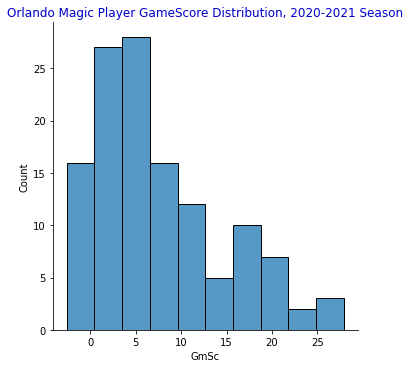

In [5]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

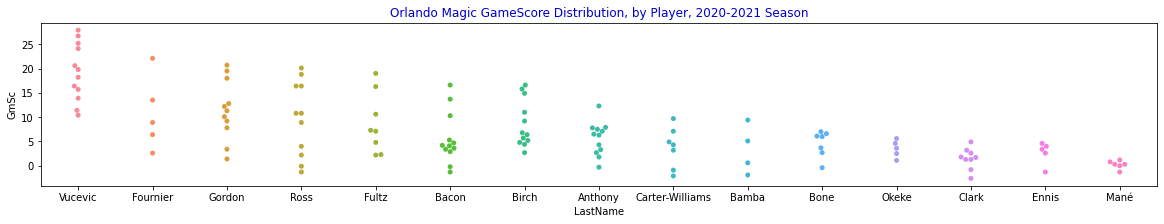

In [6]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

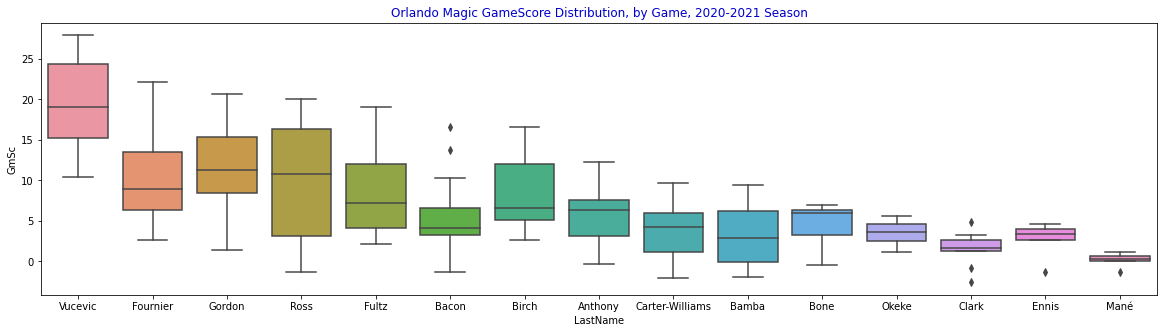

In [7]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


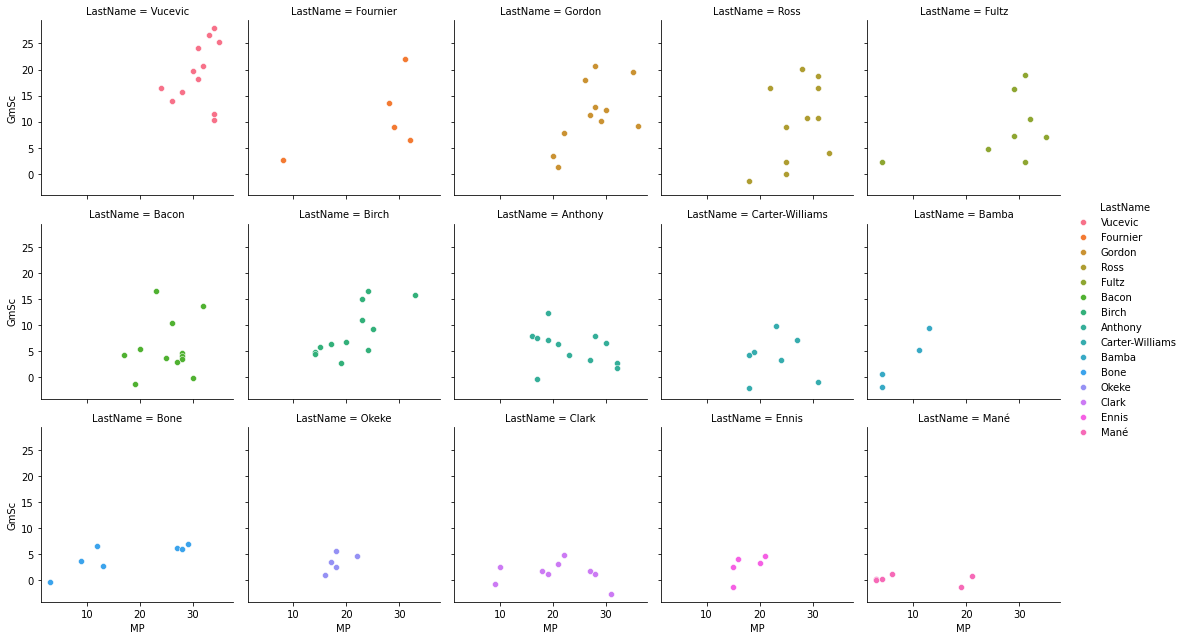

In [11]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

K:\Users\adria\Downloads\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


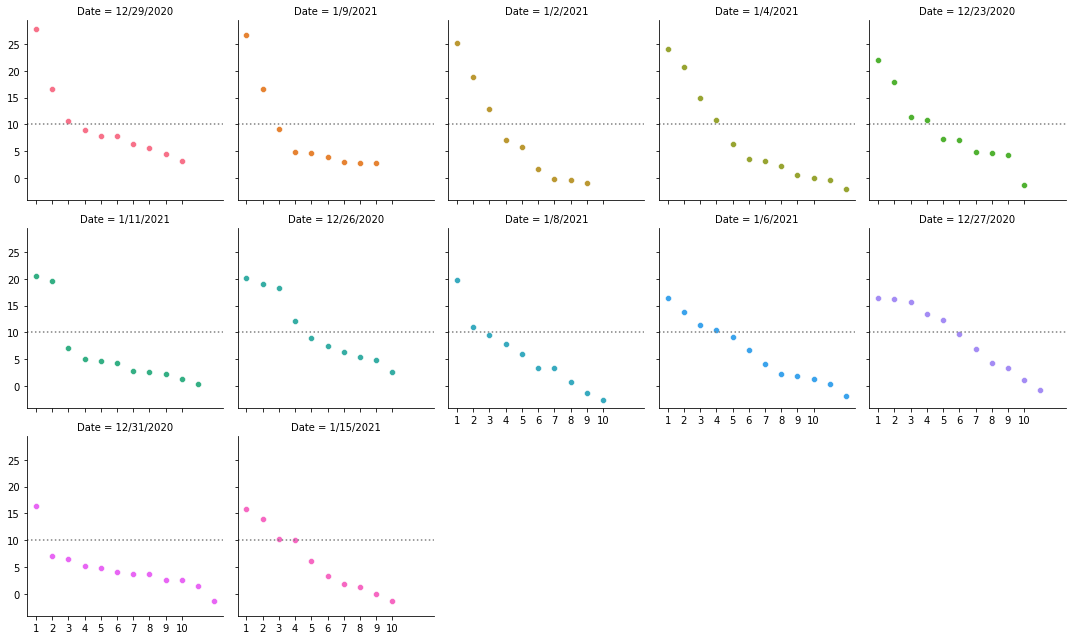

In [12]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [13]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                        
                count       mean       std   min     25%    50%     75%   max
LastName                                                                     
Anthony          12.0   5.600000  3.395452  -0.3   3.150   6.40   7.575  12.3
Bacon            12.0   5.608333  5.318827  -1.3   3.275   4.15   6.550  16.6
Bamba             4.0   3.300000  4.992661  -1.9  -0.025   2.85   6.175   9.4
Birch            12.0   8.625000  4.829667   2.7   5.100   6.60  11.975  16.6
Bone              7.0   4.528571  2.688069  -0.4   3.200   6.00   6.350   7.0
Carter-Williams   7.0   3.742857  4.171274  -2.1   1.150   4.30   6.000   9.7
Clark             9.0   1.488889  2.178557  -2.6   1.300   1.70   2.600   4.9
Ennis             5.0   2.660000  2.334095  -1.3   2.600   3.40   4.000   4.6
Fournier          5.0  10.700000  7.502333   2.6   6.400   8.90  13.500  22.1
Fultz             8.0   8.700000  6.215189   2.2   4.175   7.20  12.025  19.0
Gordon           11.0  11.490909  6.177937   1.4   8.500  11.30  15.400  20.7
Mané              6.0   0.216667  0.856543  -1.3   0.075   0.30   0.675   1.2
Okeke             5.0   3.480000  1.759830   1.1   2.500   3.60   4.600   5.6
Ross             11.0   9.727273  7.678423  -1.3   3.100  10.80  16.400  20.1
Vucevic          12.0  19.191667  5.890896  10.4  15.250  19.00  24.375  27.9

In [44]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName']].groupby(['LastName'], as_index=True).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc
LastName              
Vucevic          230.3
Gordon           126.4
Ross             107.0
Birch            103.5
Fultz             69.6
Bacon             67.3
Anthony           67.2
Fournier          53.5
Bone              31.7
Carter-Williams   26.2
Okeke             17.4
Clark             13.4
Ennis             13.3
Bamba             13.2
Mané               1.3
